In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# http://cs231n.github.io/neural-networks-3/#sgd
# http://ufldl.stanford.edu/wiki/index.php/UFLDL_Tutorial
# http://ufldl.stanford.edu/wiki/index.php/Fine-tuning_Stacked_AEs
# http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization
# http://www.holehouse.org/mlclass/09_Neural_Networks_Learning.html
# https://medium.com/a-year-of-artificial-intelligence/lenny-2-autoencoders-and-word-embeddings-oh-my-576403b0113a#.qp50ktjer

In [94]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
from hw1.src.misc import transform_data

In [64]:
mnist = np.load("./hw1/data/mnist_28x28_train-test-cv.npz")
train_data = transform_data(mnist["train"], norm=False)
cv_data = transform_data(mnist["cv"], norm=False)
test_data = transform_data(mnist["test"], norm=False)

In [65]:
train_x, train_y = zip(*train_data)
cv_x, cv_y = zip(*cv_data)
test_x, test_y = zip(*test_data)

In [66]:
def add_noise(x):
    r = np.random.normal(0.0, 0.3, size=28*28)
    r[r < 0] = 0
    return x + r

In [67]:
noise_train_x = map(add_noise, train_x)
noise_cv_x = map(add_noise, cv_x)

In [68]:
encoder_train_data = zip(train_x, train_x)
encoder_cv_data = zip(cv_x, cv_x)

noise_encoder_train_data = zip(noise_train_x, train_x)
noise_encoder_cv_data = zip(noise_cv_x, cv_x)

In [69]:
# load pre-trained models

In [70]:
model = np.load("./hw2/files/rbm_784x100.npz")
h_model = np.load("./hw2/files/rbm_100x32.npz")

In [71]:
from hw1.src.NNMiniBatch import NNMiniBatch

In [72]:
from hw1.src.functions.activation_objs import IdentyFunc, TanhFunc, LogisticFunc, SoftmaxFunc, ReLuFunc
from hw1.src.functions.cost_objs import QuadraticCost, CrossEntropyCost, MulticlassCrossEntropyCost

In [125]:
def plot_results(nn):
    plt.figure(figsize=(16, 5))

    gs = gridspec.GridSpec(2, 5, wspace=0.0, hspace=0.0)
    ax = plt.subplot(gs[:2, :2])
    ax.plot(range(len(nn.scores)), nn.scores);

    for i in range(3):
        test_sample = test_x[np.random.randint(0, 1000)]
        ax = plt.subplot(gs[0, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        ax.imshow((test_sample).reshape((28,28)), cmap="gray")
        ax = plt.subplot(gs[1, 2 + i]);ax.set_xticks([]);ax.set_yticks([]);
        ax.imshow(nn.feedforward(test_sample).reshape((28,28)), cmap="gray")

In [ ]:
# nn.w[1] = model["w"].T
# nn.b[1] = model["b"][np.newaxis, :]

# nn.w[2] = h_model["w"].T
# nn.b[2] = h_model["b"][np.newaxis, :]

# nn.w[3] = h_model["w"]
# nn.b[3] = h_model["a"][np.newaxis, :]

# nn.w[4] = model["w"]
# nn.b[4] = model["a"][np.newaxis, :]

### Эксперимент 1

In [154]:
params = {
    "sizes": [784, 400, 784],
    "activation_functions": [TanhFunc, IdentyFunc],
    "cost_function": QuadraticCost,
    "epochs": 200,
    "eta": 0.01,
    "l2_rate": 0.6,
    "momentum": 0.0,
    "mini_batch_size": 500,
    "mode": "batch"
}

nn = NNMiniBatch(**params)
nn.sgd(encoder_train_data, encoder_cv_data);

w_sizes [(400, 784), (784, 400)]
b_sizes [(1, 400), (1, 784)]
Epoch 199: 208 / 10000 | 12.2631540927 | 0.0112256596817

**Увеличил кол-во слоев и стало намного лучше**

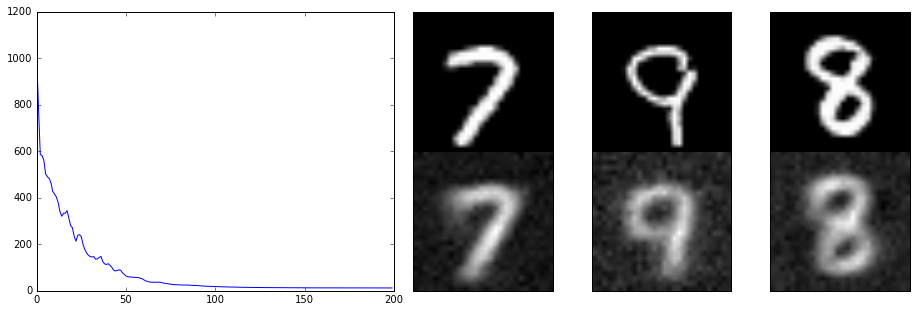

In [155]:
plot_results(nn)

### Эксперимент 2

*Добавим моменты*

In [186]:
params = {
    "sizes": [784, 400, 784],
    "activation_functions": [TanhFunc, IdentyFunc],
    "cost_function": QuadraticCost,
    "epochs": 200,
    "eta": 0.01,
    "l2_rate": 0.6,
    "momentum": 0.6,
    "mini_batch_size": 500,
    "mode": "batch"
}

nn = NNMiniBatch(**params)
nn.sgd(encoder_train_data, encoder_cv_data);

w_sizes [(400, 784), (784, 400)]
b_sizes [(1, 400), (1, 784)]
Epoch 199: 133 / 10000 | 10.9755021661 | 0.00888605092967

**С моментом стало лучше**

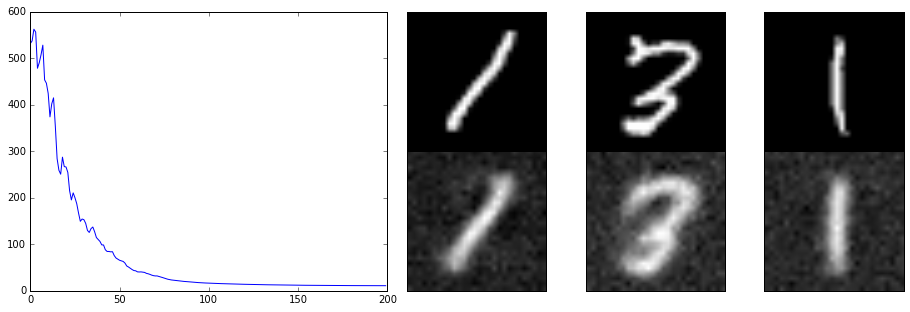

In [188]:
plot_results(nn)

## Эксперимент 3

In [232]:
params = {
    "sizes": [784, 300, 784],
    "activation_functions": [TanhFunc, IdentyFunc],
    "cost_function": QuadraticCost,
    "epochs": 200,
    "eta": 0.01,
    "l2_rate": 0.6,
    "momentum": 0.5,
    "mini_batch_size": 400,
    "mode": "batch"
}

nn = NNMiniBatch(**params)
nn.sgd(encoder_train_data, encoder_cv_data);

w_sizes [(300, 784), (784, 300)]
b_sizes [(1, 300), (1, 784)]
Epoch 199: 201 / 10000 | 11.8575178095 | 0.00817614514982

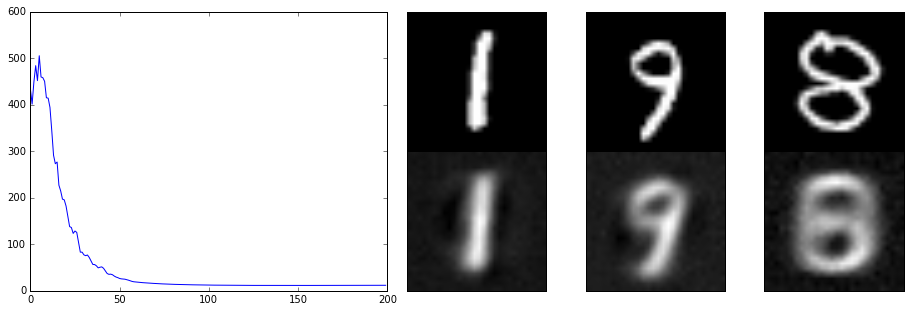

In [234]:
plot_results(nn)